In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
incom_pred = pd.read_csv("adult.csv")

In [3]:
incom_pred.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
##Data cleansing

In [5]:
incom_pred.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
incom_pred.shape

(32561, 15)

In [7]:
incom_pred = incom_pred.replace('?',np.nan)

In [8]:
for c in incom_pred:
    print(incom_pred[c].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
123011    13
203488    13
164190    13
126675    12
121124    12
          ..
36376      1
78567      1
180407     1
210869     1
125489     1
Name: fnlwgt, Length: 21648, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
9     10501
10     7291
13     5355
14     1723
1

In [9]:
#Mapping binary values to the expected output

incom_pred['income']=incom_pred['income'].map({'<=50K': 0, '>50K': 1})

In [10]:
incom_pred.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [11]:
incom_pred.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [12]:
for c in incom_pred[['workclass','occupation','native.country']]:
    print(incom_pred[c].dtypes)
    

object
object
object


In [13]:
incom_pred['native.country'] = incom_pred['native.country'].fillna("United-States")
  

In [14]:
incom_pred.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [15]:
incom_pred['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [16]:
incom_pred['occupation'].describe()

count              30718
unique                14
top       Prof-specialty
freq                4140
Name: occupation, dtype: object

In [17]:
#Since mode is Prof-specialty, replacing null values with it

incom_pred['occupation'] = incom_pred['occupation'].fillna('Prof-specialty')

In [18]:
incom_pred['workclass'].describe()


count       30725
unique          8
top       Private
freq        22696
Name: workclass, dtype: object

In [19]:
#Since mode is Private, replacing null values with it

incom_pred['workclass'] = incom_pred['workclass'].fillna('Private')

In [20]:
# Convert Sex value to 0 and 1
incom_pred["sex"] = incom_pred["sex"].map({"Male": 0, "Female":1})


In [21]:
incom_pred.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,1,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,1,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0


In [22]:
# Create Married Column - Binary Yes(1) or No(0)
incom_pred["marital.status"] = incom_pred["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
incom_pred["marital.status"] = incom_pred["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
incom_pred["marital.status"] = incom_pred["marital.status"].map({"Married":1, "Single":0})
incom_pred["marital.status"] = incom_pred["marital.status"].astype(int)

In [23]:
incom_pred.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,0,Prof-specialty,Not-in-family,White,1,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,0,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,0,Prof-specialty,Unmarried,Black,1,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,0,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,0,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0


In [24]:
#Since mode is United-States, replacing null values with it

incom_pred['native.country'] = incom_pred['native.country'].fillna('United-States')

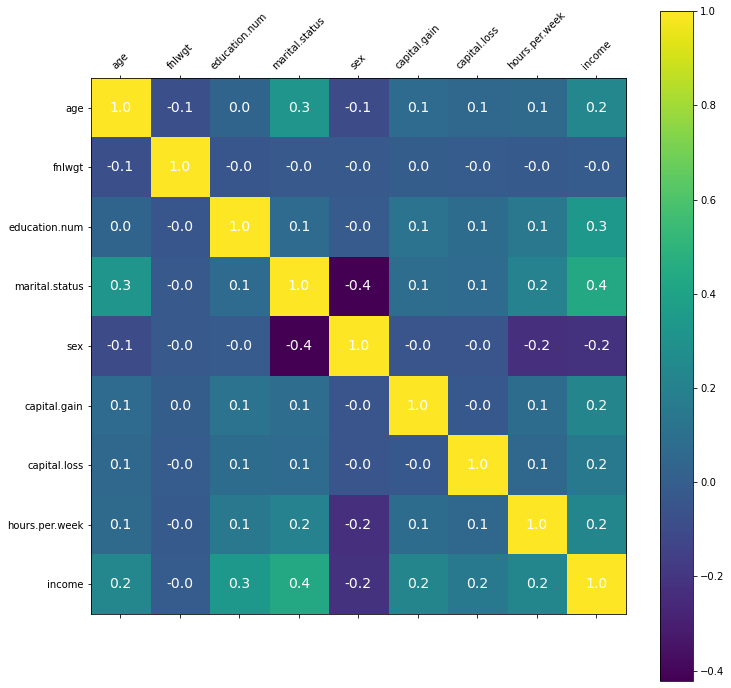

In [25]:
#Ploting the correlation between the output(income) and individual features
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 12
plt.matshow(incom_pred.corr())
plt.colorbar()
plt.xticks(np.arange(len(incom_pred.corr().columns)), incom_pred.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(incom_pred.corr().columns)), incom_pred.corr().columns.values) 
for (i, j), corr in np.ndenumerate(incom_pred.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [26]:
#Since 'fnlwgt' it has 0 correlation, it can be dropped

incom_pred.drop(['fnlwgt'], axis = 1, inplace = True)

In [27]:
#Distributing Age column in 3 significant parts and plotting it corresponding to the output feature(income)

incom_pred['age'] = pd.cut(incom_pred['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

In [28]:
incom_pred.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,Old,Private,HS-grad,9,0,Prof-specialty,Not-in-family,White,1,0,4356,40,United-States,0
1,Old,Private,HS-grad,9,0,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0
2,Old,Private,Some-college,10,0,Prof-specialty,Unmarried,Black,1,0,4356,40,United-States,0
3,Old,Private,7th-8th,4,0,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0
4,Adult,Private,Some-college,10,0,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0


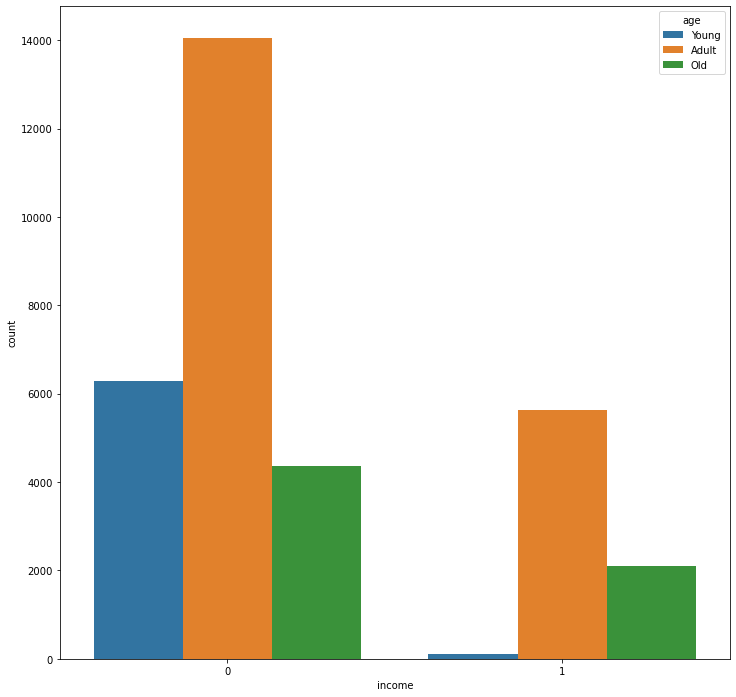

In [29]:
sns.countplot(x = 'income', hue = 'age', data = incom_pred)

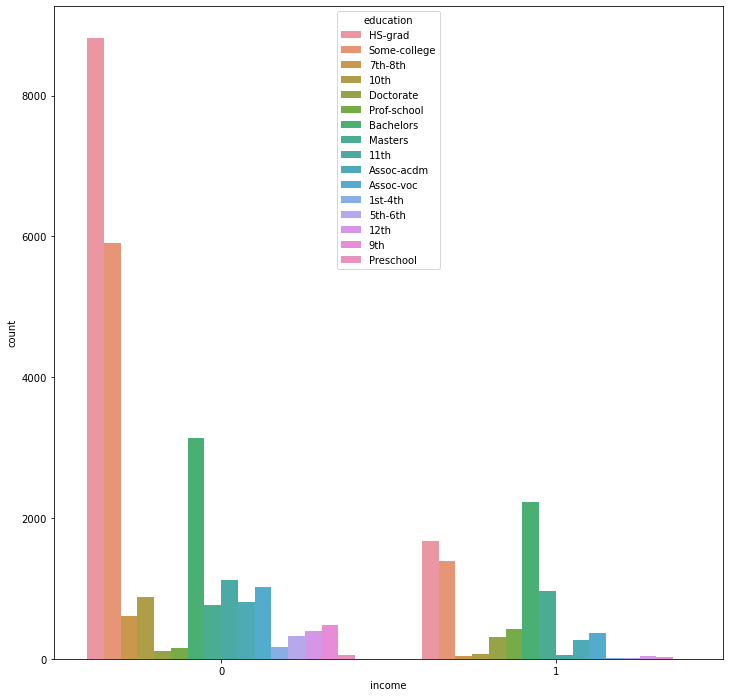

In [30]:
#Plot of education corresponding to income

sns.countplot(x = 'income', hue = 'education', data = incom_pred)

In [31]:
#Combining the lower grades of education together

incom_pred.drop(['education.num'], axis = 1, inplace = True)
incom_pred['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
incom_pred['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
 School          4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

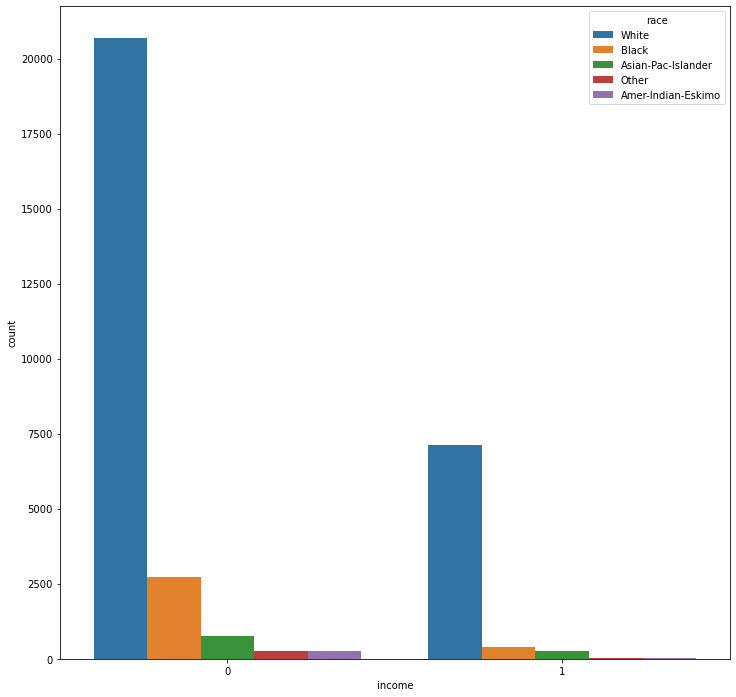

In [32]:
sns.countplot(x = 'income', hue = 'race', data = incom_pred)

In [33]:
#Since majority of race is white, the rest of races can be combined together to form a new group

incom_pred['race'].unique()
incom_pred['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

In [34]:
count = incom_pred['native.country'].value_counts()
count

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [35]:
incom_pred.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,Old,Private,HS-grad,0,Prof-specialty,Not-in-family,White,1,0,4356,40,United-States,0
1,Old,Private,HS-grad,0,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0
2,Old,Private,Some-college,0,Prof-specialty,Unmarried,Other,1,0,4356,40,United-States,0
3,Old,Private,School,0,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0
4,Adult,Private,Some-college,0,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0


In [36]:
incom_pred['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [37]:
incom_pred['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [38]:
incom_pred['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
 School          4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

In [39]:
#Combining all other into one class

countries = np.array(incom_pred['native.country'].unique())
countries = np.delete(countries, 0)

In [40]:
countries

array(['Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan', 'India',
       'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [41]:
incom_pred['native.country'].replace(countries, 'Other', inplace = True)

In [42]:
incom_pred['native.country'].value_counts()

United-States    29753
Other             2808
Name: native.country, dtype: int64

In [43]:
for c in incom_pred:
    print(incom_pred[c].value_counts())

Adult    19690
Old       6460
Young     6411
Name: age, dtype: int64
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
 School          4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64
0    17144
1    15417
Name: marital.status, dtype: int64
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64
Husband      

In [44]:
incom_pred['hours.per.week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

In [45]:
incom_pred.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,Old,Private,HS-grad,0,Prof-specialty,Not-in-family,White,1,0,4356,40,United-States,0
1,Old,Private,HS-grad,0,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0
2,Old,Private,Some-college,0,Prof-specialty,Unmarried,Other,1,0,4356,40,United-States,0
3,Old,Private,School,0,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0
4,Adult,Private,Some-college,0,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0


In [46]:
incom_pred['age'].describe

<bound method NDFrame.describe of 0          Old
1          Old
2          Old
3          Old
4        Adult
         ...  
32556    Young
32557    Adult
32558    Adult
32559      Old
32560    Young
Name: age, Length: 32561, dtype: category
Categories (3, object): [Young < Adult < Old]>

In [47]:
incom_pred["age"] = incom_pred["age"].map({"Old":2,"Adult":1, "Young":0})

In [48]:
incom_pred['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
incom_pred['workclass']=le.fit_transform(incom_pred['workclass'])

In [51]:
incom_pred['workclass'].value_counts()

3    24532
5     2541
1     2093
6     1298
4     1116
0      960
7       14
2        7
Name: workclass, dtype: int64

In [52]:
incom_pred.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,2,3,HS-grad,0,Prof-specialty,Not-in-family,White,1,0,4356,40,United-States,0
1,2,3,HS-grad,0,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0
2,2,3,Some-college,0,Prof-specialty,Unmarried,Other,1,0,4356,40,United-States,0
3,2,3,School,0,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0
4,1,3,Some-college,0,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0


In [53]:
incom_pred['education']=le.fit_transform(incom_pred['education'])
incom_pred['occupation']=le.fit_transform(incom_pred['occupation'])
incom_pred['relationship']=le.fit_transform(incom_pred['relationship'])
incom_pred['race']=le.fit_transform(incom_pred['race'])
incom_pred['native.country']=le.fit_transform(incom_pred['native.country'])

In [54]:
incom_pred.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,2,3,5,0,9,1,1,1,0,4356,40,1,0
1,2,3,5,0,3,1,1,1,0,4356,18,1,0
2,2,3,8,0,9,4,0,1,0,4356,40,1,0
3,2,3,0,0,6,4,1,1,0,3900,40,1,0
4,1,3,8,0,9,3,1,1,0,3900,40,1,0


In [55]:

#Splitting the data set into features and outcome

X = incom_pred.drop(['income'], axis=1)
Y = incom_pred['income']

In [56]:
X.iloc[0]

age                  2
workclass            3
education            5
marital.status       0
occupation           9
relationship         1
race                 1
sex                  1
capital.gain         0
capital.loss      4356
hours.per.week      40
native.country       1
Name: 0, dtype: object

In [57]:
incom_pred['race'].value_counts()

1    27816
0     4745
Name: race, dtype: int64

In [58]:
# Create Test Variables
from sklearn.model_selection import train_test_split
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

In [59]:
# Params for Random Forest
num_trees = 100
max_features = 3


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 85.52126516198373%
[[4591  373]
 [ 570  979]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4964
           1       0.72      0.63      0.67      1549

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



<h1>Pickle</h1>

In [61]:
import pickle

In [62]:
# in our project folder directory, our data is stored with log_model.pkl name
pickle.dump(random_forest, open('log_model.pkl','wb'))

In [63]:
# Instead of predictng values for the test datasets , we can also predict the values by creating oour array with corresponding
# vslues to the test dataset
l= random_forest.predict([[2,2,5,1,8,2,0,0,0,3600,18,0]])

In [64]:
a = pickle.load(open('log_model.pkl','rb'))

In [65]:
b = a.predict([[2,2,5,1,8,2,0,0,0,3600,18,0]])

In [66]:
val =int(b)

In [67]:
#for our given values, the loan is approved

map={1:"Yes",0:"No"}

In [68]:
print('Adult Income >=50K -',map[val])

Adult Income >=50K - No
